<a href="https://colab.research.google.com/github/mlopezd01/Proyecto-Ingenias/blob/main/Notebook_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales

Esta notebook tiene dos partes:

## Primera parte:

Vamos a construir la unidad básica de las redes neuronales, el Perceptrón. Para esto, vamos a trabajar con dos situaciones:

1. **Perceptrón 2D**: vamos a entrenar un Perceptrón con Keras sobre un dataset ficticio.
2. **MNIST**: Vamos a trabajar con este dataset para identificar dígitos, del 0 al 9, escritos a manos.

## Segunda parte:

Vamos a trabajar con el dataset **Fashion MNIST** y crear una red neuronal. El codigo esta escrito. La idea es que entiendan y analisen como se crea una red neuronal y los parametros que pueden seleccionarse para mejorar su desempeño.

### Perceptrón en 2D

Vamos a generar un dataset sintético con unas funciones que ya vienen incorporadas en scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
from sklearn.datasets import make_blobs, make_moons, make_circles
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=42)

In [33]:
type(y)

numpy.ndarray

In [3]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [20]:
print(X)
print(y)

[[-0.74308378  0.64131865]
 [ 1.4010638  -1.13378612]
 [ 0.65675766 -1.37718359]
 ...
 [ 0.58280238 -1.42482465]
 [ 1.25304633 -0.99589777]
 [-0.37975222  0.72956832]]
[0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0
 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1
 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1
 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0
 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0
 1 0 0 

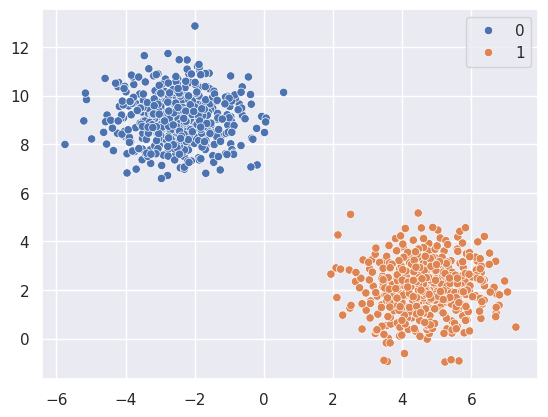

In [4]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Reescalamos los datos

In [5]:
X[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

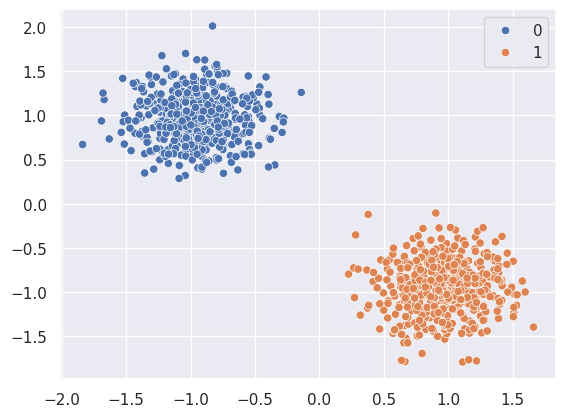

In [6]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Definamos ahora el modelo a entrenar y miremos sus caracteristicas:

In [49]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
optimizer = keras.optimizers.Adam(learning_rate=0.002, beta_1=0.0, beta_2=0.0, epsilon=None, amsgrad=False)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
#compruebo que y no esta vacio
print(type(y), y.shape)
print(y[:5])

<class 'numpy.ndarray'> (1000,)
[0 1 1 1 1]


In [52]:
model_trained = model.fit(X, y, epochs=1000, validation_split=0.25)

Epoch 1/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6862 - loss: 0.5551 - val_accuracy: 0.9000 - val_loss: 0.5283
Epoch 2/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9332 - loss: 0.5182 - val_accuracy: 1.0000 - val_loss: 0.4834
Epoch 3/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.4661 - val_accuracy: 1.0000 - val_loss: 0.4436
Epoch 4/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.4334 - val_accuracy: 1.0000 - val_loss: 0.4083
Epoch 5/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.4004 - val_accuracy: 1.0000 - val_loss: 0.3781
Epoch 6/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.3703 - val_accuracy: 1.0000 - val_loss: 0.3511
Epoch 7/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.3444 - val_accuracy: 1.0000 - val_loss: 0.3261
Epoch 8/1000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.3216 - val_accuracy: 1

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53 (216.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36 (148.00 B)

## 2. MNIST

El dataset de [MNIST](https://en.wikipedia.org/wiki/MNIST_database) consiste en dígitos escritos a mano. Se utiliza frecuentemente para probar redes neuronales y entender como funcionan sin preocuparnos por las caracteristicas de los datos.


In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

**1. Carga de datos**

El dataset MNIST esta precargado en sklearn

In [ ]:
from sklearn.datasets import load_digits
images_digits = load_digits()

Miramos algunas de las imagenes y datos de entrenamiento

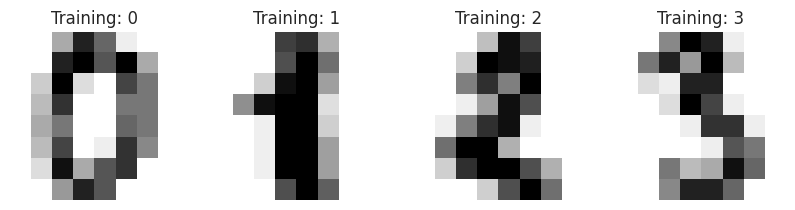

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, images_digits.images, images_digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

**2. Preprocesado**

In [ ]:
todas_imagenes = images_digits.images
print(todas_imagenes.shape)

(1797, 8, 8)


In [ ]:
n_samples = len(todas_imagenes)
data = todas_imagenes.reshape((n_samples, -1))

from keras.utils import np_utils
y = np_utils.to_categorical(images_digits.target, 10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.5, shuffle=False)

**3. Entrenamiento del modelo**

Comenzar entrenando un Red Neuronal de una capa, con diez neuronas, función de activación `softmax` y pérdida `categorical_crossentropy`. Usar como optimizador `Adam` y `epoch = 20`.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras

model = Sequential()
model.add(Dense(10, activation='softmax'))

optimizador = keras.optimizers.Adam(lr=0.002, beta_1=0.0, beta_2=0.0, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=optimizador,loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


26/26 [==============================] - 0s 8ms/step - loss: 16.6331 - accuracy: 0.0681 - val_loss: 16.7303 - val_accuracy: 0.0222
Epoch 2/20
26/26 [==============================] - 0s 2ms/step - loss: 16.4083 - accuracy: 0.1040 - val_loss: 17.1489 - val_accuracy: 0.0667
Epoch 3/20
26/26 [==============================] - 0s 2ms/step - loss: 18.0483 - accuracy: 0.2215 - val_loss: 18.1608 - val_accuracy: 0.2667
Epoch 4/20
26/26 [==============================] - 0s 2ms/step - loss: 22.5487 - accuracy: 0.2562 - val_loss: 39.1277 - val_accuracy: 0.0556
Epoch 5/20
26/26 [==============================] - 0s 2ms/step - loss: 41.5035 - accuracy: 0.1621 - val_loss: 51.2915 - val_accuracy: 0.0778
Epoch 6/20
26/26 [==============================] - 0s 3ms/step - loss: 43.8844 - accuracy: 0.1968 - val_loss: 63.5088 - val_accuracy: 0.1333
Epoch 7/20
26/26 [==============================] - 0s 3ms/step - loss: 57.2650 - accuracy: 0.2413 - val_loss: 55.4465 - val_accuracy: 0.1667
Epoch 8/20
26/26 

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


**4. Evaluación de los resultados.**


In [ ]:
y_test_pred = model.predict(X_test)

29/29 [==============================] - 0s 2ms/step


In [ ]:
y_test_pred = np.argmax(y_test_pred, axis = 1)
y_test_pred.shape

(899,)

In [ ]:
from sklearn.metrics import confusion_matrix

y_test = np.argmax(y_test,axis = 1)

confusion_matrix(y_test, y_test_pred)

array([[88,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [91,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [86,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [89,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [92,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [91,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [91,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [88,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [88,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [92,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.09788654060066741

Vamos a entrenar la red neuronal una capa con 800 neuronas y función de activación `relu`.

In [ ]:
model = Sequential()
model.add(Dense(800, activation='softmax'))
model.add(Dense(10, activation='softmax'))

optimizador = keras.optimizers.Adam(lr=0.002, beta_1=0.0, beta_2=0.0, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=optimizador,loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


26/26 [==============================] - 1s 8ms/step - loss: 2.2432 - accuracy: 0.6250 - val_loss: 2.1979 - val_accuracy: 0.7667
Epoch 2/20
26/26 [==============================] - 0s 4ms/step - loss: 2.1549 - accuracy: 0.8577 - val_loss: 2.1148 - val_accuracy: 0.8333
Epoch 3/20
26/26 [==============================] - 0s 3ms/step - loss: 2.0901 - accuracy: 0.8490 - val_loss: 2.0494 - val_accuracy: 0.8111
Epoch 4/20
26/26 [==============================] - 0s 3ms/step - loss: 2.0132 - accuracy: 0.8800 - val_loss: 2.0056 - val_accuracy: 0.9333
Epoch 5/20
26/26 [==============================] - 0s 2ms/step - loss: 1.9655 - accuracy: 0.9097 - val_loss: 1.9699 - val_accuracy: 0.8000
Epoch 6/20
26/26 [==============================] - 0s 3ms/step - loss: 1.9004 - accuracy: 0.8886 - val_loss: 1.8851 - val_accuracy: 0.8444
Epoch 7/20
26/26 [==============================] - 0s 2ms/step - loss: 1.8343 - accuracy: 0.9022 - val_loss: 1.8140 - val_accuracy: 0.9222
Epoch 8/20
26/26 [=============

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 800)               52000     
                                                                 
 dense_5 (Dense)             (None, 10)                8010      
                                                                 
Total params: 60,010
Trainable params: 60,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_test_pred = model.predict(X_test)

29/29 [==============================] - 0s 1ms/step


In [ ]:
y_test_pred = np.argmax(y_test_pred, axis = 1)
y_test_pred.shape

(899,)

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[87,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 48,  7,  1,  2,  3,  0, 17,  0, 13],
       [ 0,  0, 71, 13,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0, 59,  1, 15,  0,  3,  7,  6],
       [ 7,  0,  0,  0, 78,  1,  0,  6,  0,  0],
       [ 0,  0,  0,  1,  2, 88,  0,  0,  0,  0],
       [ 1,  4,  0,  0,  0,  3, 83,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0, 67,  0,  2],
       [ 0,  2,  0,  6,  0, 17,  0, 15, 43,  5],
       [ 0,  0,  0,  3,  1,  5,  0,  4,  5, 74]])

In [ ]:
accuracy_score(y_test, y_test_pred)

0.7764182424916574

# Segunda Parte

## Ejercicio

Utilizaremos ahora el dataset [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist), que consiste en un train set de 60,000 ejemplos y un test set de 10,000 ejemplos. Cada sample es una imagen en escala de grises de 28x28, asociada con una etiqueta de 10 clases.


<center>![Fashion_MNIST](https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/fashion-mnist-sprite.png?raw=true)<center>

El dataset Fashion-MNIST viene precargado en Keras en objetos de tipo Numpy arrays.

In [ ]:
import keras
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Cargamos el dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Verificación de etiquetas
import numpy as np
np.unique(y_train, return_counts = True), np.unique(y_test, return_counts = True) #returncounts: distribución. Ese es el 6000 etc

((array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])),
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])))

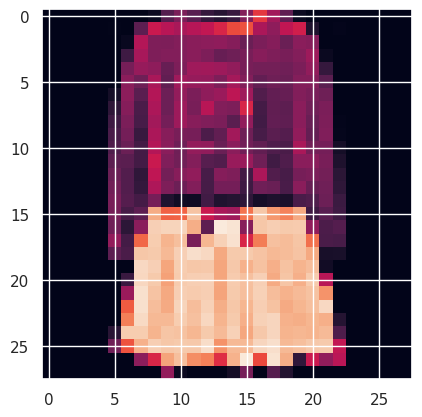

In [ ]:
# Visualizamos una prenda al azar
plt.imshow(x_train[np.random.randint(low=0, high=60001, size=1)[0]]);

Transformamos a continuación los datos de forma tal de que sirvan como input de nuestros modelos:

In [ ]:
# Almacenamos en variables la cantidad de etiquetas objetivo y el tamaño de las imágenes, así como también el input size de nuestros modelos
num_labels = len(np.unique(y_train))
image_size = x_train.shape[1]
input_size = image_size * image_size

# Hacemos un reshape de los datos y convertimos a float
x_train = x_train.reshape((60000, input_size))
x_train = x_train.astype('float64') / 255 #min max scaler

x_test = x_test.reshape((10000, input_size))
x_test = x_test.astype('float64') / 255

# Convertimos el vector objetivo a categórico
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

A continuación, construimos una red con dos capas intermedias, cada una con 256 unidades, que serán activadas con la función `relu`. La última capa tendrá 10 unidades (una por cada clase) y será activada con la softmax.

In [ ]:
from keras import models, layers

rednn = models.Sequential()
rednn.add(layers.Dense(256, activation='relu', input_dim=input_size))
rednn.add(layers.Dense(256, activation='relu'))
rednn.add(layers.Dense(10, activation='softmax'))

rednn.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
rednn.fit(x_train, y_train, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.5498 - accuracy: 0.7999
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3784 - accuracy: 0.8600
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3349 - accuracy: 0.8750
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3085 - accuracy: 0.8846
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2874 - accuracy: 0.8927
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2718 - accuracy: 0.8974
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2595 - accuracy: 0.9027
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2471 - accuracy: 0.9062
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2372 - accuracy: 0.9104
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2284 - accuracy: 0.9122

In [ ]:
# Evaluamos en test
test_loss, test_acc = rednn.evaluate(x_test, y_test)
print('test_acc:', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.3549 - accuracy: 0.8842
test_acc: 0.8841999769210815


Vamos a explorar otro [optimizadores](https://keras.io/optimizers/): **Stochastic Gradient Descent**.

In [ ]:
# Importamos el módulo optimizers
from keras import optimizers

### SGD

In [ ]:
sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
rednn = models.Sequential()
rednn.add(layers.Dense(256, activation='relu', input_dim=input_size))
rednn.add(layers.Dense(256, activation='relu'))
rednn.add(layers.Dense(10, activation='softmax'))

rednn.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
rednn.fit(x_train, y_train, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 1.0800 - accuracy: 0.6770
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6378 - accuracy: 0.7898
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.5539 - accuracy: 0.8145
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.5113 - accuracy: 0.8276
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4852 - accuracy: 0.8349
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4657 - accuracy: 0.8404
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4504 - accuracy: 0.8460
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4382 - accuracy: 0.8491
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4287 - accuracy: 0.8520
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4197 - accuracy: 0.8544

In [ ]:
# Evaluamos en test
test_loss, test_acc = rednn.evaluate(x_test, y_test)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4527 - accuracy: 0.8370
test_acc: 0.8370000123977661


# Regularización

Vamos ahora a entender como funciona la regularización. El objetivo será comparar el modelo anterior entrenado sin regularización y un modelo con regularización Dropout para poder evaluar cuál de ellos realiza mejor la tarea de clasificación de imágenes.

In [ ]:
# Importamos las librerías, módulos y utilidades necesarias

from keras.layers import Activation

## Clasificador con Dropout

In [ ]:
# Seteamos el dropout
from keras.layers import Dropout
dropout = 0.1 # Fracción de las unidades de input a droppear

model = Sequential()

model.add(Dense(256, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 10)               

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 5s 8ms/step - loss: 0.5578 - accuracy: 0.7994
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3947 - accuracy: 0.8539
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3509 - accuracy: 0.8713
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3273 - accuracy: 0.8788
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3102 - accuracy: 0.8852
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2957 - accuracy: 0.8907
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2832 - accuracy: 0.8934
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2757 - accuracy: 0.8961
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2648 - accuracy: 0.9020
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2589 - accuracy: 0.90

In [ ]:
# Validamos el modelo usando los datos del dataset de testeo
score_dropout = model.evaluate(x_test, y_test, batch_size=128)
print("\nTest accuracy: %.1f%%" % (100.0 * score_dropout[1]))

79/79 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8785

Test accuracy: 87.8%
